# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/ds3001f25/eda_assignment.git`
### Do Q1, Q2, and Q3.

**Q1.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
3. Show that $\text{cov}(a+bX,a+bX) = b^2 \text{cov}(X,X) $, and in particular that $\text{cov}(X,X) = s^2 $.
4. Instead of the mean, consider the median. Consider transformations that are non-decreasing (if $x\ge x'$, then $g(x)\ge g(x')$), like $2+5 \times X$ or $\text{arcsinh}(X)$. Is a non-decreasing transformation of the median the median of the transformed variable? Explain. Does your answer apply to any quantile? The IQR? The range?
5. Consider a non-decreasing transformation $g()$. Is is always true that $m(g(X))= g(m(X))$?

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Q2.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. This provides a dataset of AirBnB rental properties for New York City.  
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?

In [7]:
#1

df = pd.read_csv('./eda_assignment/data/airbnb_hw.csv')

In [12]:
#2

df.shape
# Dimensions of data: 30478 observations and 13 variables

df.columns
# Variables included: 'Host Id', 'Host Since', 'Name', 'Neighbourhood ', 'Property Type',
#                     'Review Scores Rating (bin)', 'Room Type', 'Zipcode', 'Beds',
#                     'Number of Records', 'Number Of Reviews', 'Price',
#                     'Review Scores Rating'],


df.head()

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


In [15]:
#3

pd.crosstab(df['Property Type'], df['Room Type'])

# Patterns noticed: Renting entire property is typically more common across property types, renting a shared room is rare across property types, apartments are the most rented property in this data set

# Renting a private room is more common than renting the entire property in the categories: Bed & Breakfast, Dorm, House, Hut, Other, Tent and Treehouse


Room Type,Entire home/apt,Private room,Shared room
Property Type,,,
Apartment,15669,10748,685
Bed & Breakfast,13,155,12
Boat,7,1,0
Bungalow,4,0,0
Cabin,1,1,0
Camper/RV,6,1,0
Castle,0,1,0
Chalet,0,1,0
Condominium,72,22,0


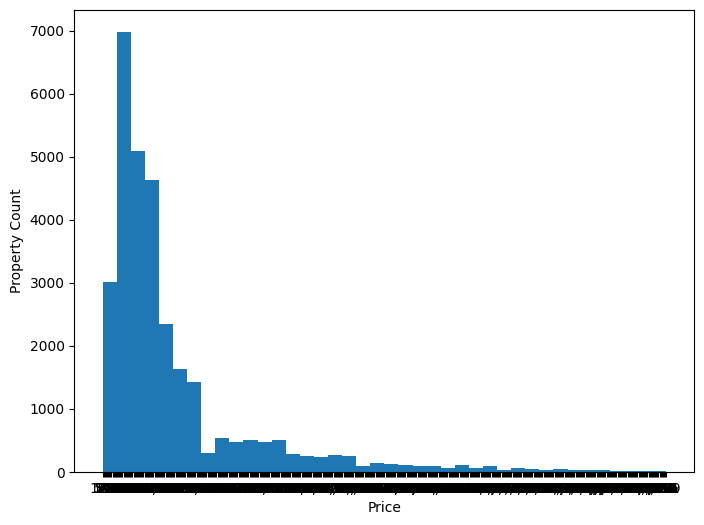

In [38]:
#4

# Histogram

plt.figure(figsize=(8,6))
plt.hist(df['Price'], bins=40)
plt.xlabel('Price')
plt.ylabel('Property Count')
plt.show()

<>:3: SyntaxWarning: invalid escape sequence '\$'
<>:3: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipython-input-379850045.py:3: SyntaxWarning: invalid escape sequence '\$'
  df['Price'] = df['Price'].replace('[\$,]', '', regex=True).astype(float)


<Axes: ylabel='Density'>

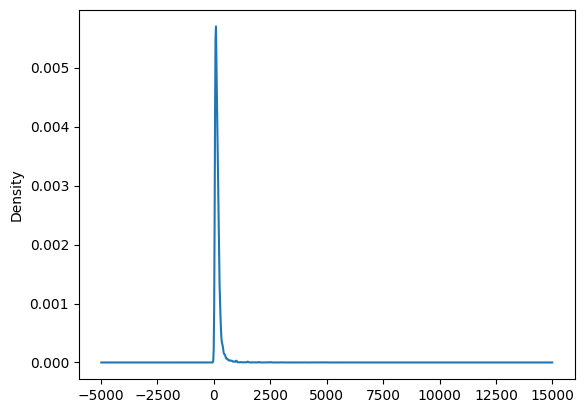

In [41]:
# Kernel Density Plot

df['Price'] = df['Price'].replace('[\$,]', '', regex=True).astype(float)

var='Price'
df[var].plot.density()

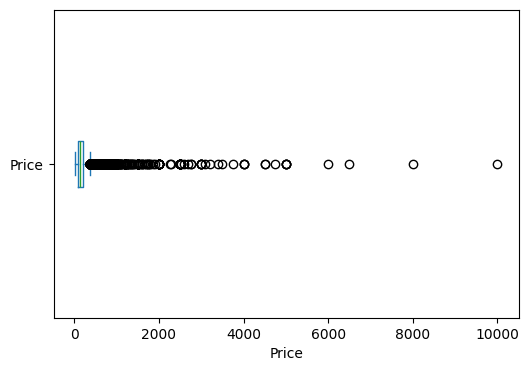

In [42]:
# Box Plot

df['Price'].plot.box(figsize=(6,4), vert=False)
plt.xlabel('Price')
plt.show()

In [43]:
# Statistical Description of Variable

df['Price'].describe()

# Data is poorly scaled, mean price is higher than median, suggesting data is skewed right
# There are extreme outliers in the data set, the 75th percentile is 195 and the max is 10,000, this gap demonstrates the severity of the outliers

,Price
count,30478.000000
mean,163.589737
std,197.785454
min,10.000000
25%,80.000000
50%,125.000000
75%,195.000000
max,10000.000000


In [48]:
# Log Transformation

df['Price_log'] = np.log1p(df['Price'])

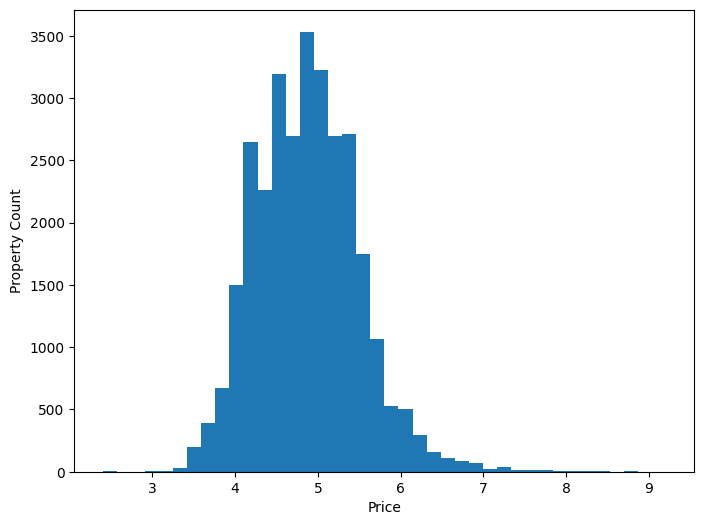

In [49]:
# Histogram Transformed

plt.figure(figsize=(8,6))
plt.hist(df['Price_log'], bins=40)
plt.xlabel('Price')
plt.ylabel('Property Count')
plt.show()

<Axes: ylabel='Density'>

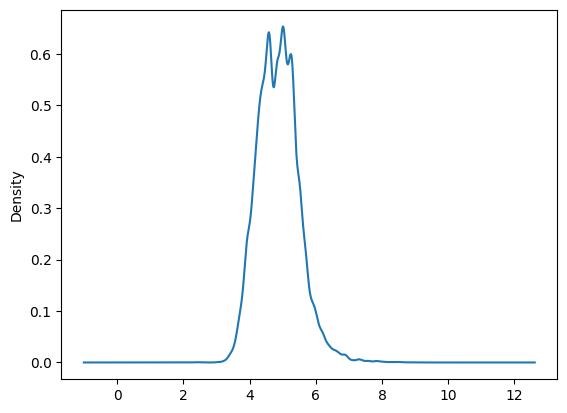

In [50]:
# Kernel Density Plot Transformed

var='Price_log'
df[var].plot.density()

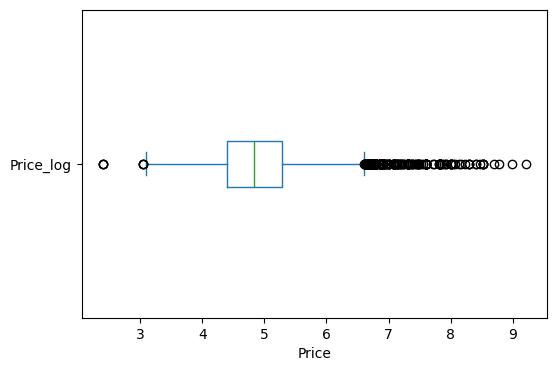

In [51]:
# Box Plot Transformed

df['Price_log'].plot.box(figsize=(6,4), vert=False)
plt.xlabel('Price')
plt.show()

In [52]:
# Statistical Description of Variable Transformed

df['Price_log'].describe()

,Price_log
count,30478.000000
mean,4.869699
std,0.622704
min,2.397895
25%,4.394449
50%,4.836282
75%,5.278115
max,9.210440


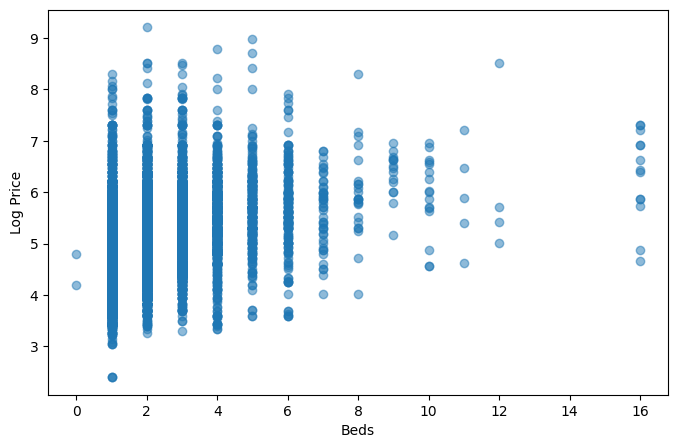

In [56]:
#5

plt.figure(figsize=(8,5))
plt.scatter(df['Beds'], df['price_log'], alpha=0.5)
plt.xlabel('Beds')
plt.ylabel('Log Price')
plt.show()

# Seems to be slight increase in price as numner of beds increases, but there are also outliers

In [57]:
df.groupby('Beds')['Price'].describe()

# Many extreme outliers exist on the max end for most bed counts, mean generally increases as bed count increases
# Standard dev generally grows as bed count increases, more variability in properties with more beds

,count,mean,std,min,25%,50%,75%,max
Beds,,,,,,,,
0.0,2.0,92.000000,38.183766,65.0,78.50,92.0,105.50,119.0
1.0,20344.0,127.673810,107.047827,10.0,75.00,100.0,155.00,4000.0
2.0,6610.0,199.061271,225.706318,25.0,115.00,160.0,225.00,10000.0
3.0,2071.0,268.118300,303.106942,26.0,140.00,200.0,300.00,5000.0
4.0,783.0,315.332056,353.184402,27.0,150.00,247.0,375.00,6500.0
5.0,284.0,411.500000,672.610659,35.0,189.75,290.0,450.00,8000.0
6.0,177.0,401.768362,417.018431,35.0,199.00,275.0,425.00,2750.0
7.0,45.0,341.377778,220.116631,55.0,177.00,300.0,445.00,900.0
8.0,24.0,589.041667,793.054934,55.0,243.75,350.0,481.25,4000.0


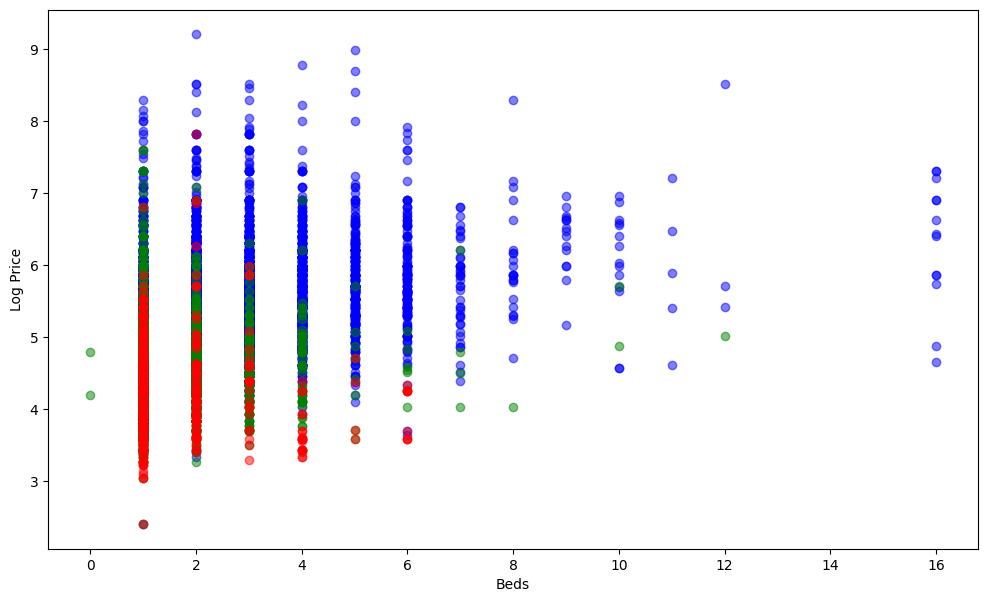

In [71]:
#6

colors = {'Entire home/apt':'blue', 'Private room':'green', 'Shared room':'red'}

plt.figure(figsize=(12,7))

for room in df['Room Type'].unique():
    subset_room = df[df['Room Type'] == room]
    for prop in subset_room['Property Type'].unique():
        subset = subset_room[subset_room['Property Type'] == prop]
        plt.scatter(subset['Beds'], subset['price_log'],
                    c=colors[room],
                    alpha=0.5,
                    label=f"{room}, {prop}")

plt.xlabel('Beds')
plt.ylabel('Log Price')
plt.show()

# Renting an entire home tends to be the most expensive, private rooms are more common in properties with less bedrooms, listing with highest number of bedrooms are almost entirely listed as entire homes

In [72]:
grouped_stats = df.groupby(['Room Type', 'Property Type'])['Price'].describe()
print(grouped_stats)

# Room Type and Property Types with the highest prices on avg are entire homes/apts in the Other and Villa categories
# These same categories also have the highest standard deviations

# The median seems to be a more reliable estimate because the mean is pulled up by the outliers

                                   count        mean          std    min  \
Room Type       Property Type                                              
Entire home/apt Apartment        15669.0  213.224839   218.097834   10.0   
                Bed & Breakfast     13.0  184.538462   119.814172   85.0   
                Boat                 7.0  158.428571    51.110524  100.0   
                Bungalow             4.0  150.750000    46.464144   87.0   
                Cabin                1.0  250.000000          NaN  250.0   
                Camper/RV            6.0  114.333333   107.685963   45.0   
                Condominium         72.0  304.861111   266.197497   80.0   
                Dorm                 4.0   44.250000    24.060687   30.0   
                House              752.0  297.263298   468.409428   27.0   
                Lighthouse           1.0   39.000000          NaN   39.0   
                Loft               392.0  330.510204   321.519721   55.0   
            

**Q3.** This question looks at a time series of the number of active oil drilling rigs in the United States over time. The data comes from the Energy Information Agency.

1. Load `./data/drilling_rigs.csv` and examine the data. How many observations? How many variables? Are numeric variables correctly read in by Pandas, or will some variables have to be typecast/coerced? Explain clearly how these data need to be cleaned.
2. To convert the `Month` variable to an ordered datetime variable, use `df['time'] = pd.to_datetime(df['Month'], format='mixed')`.
3. Let's look at `Active Well Service Rig Count (Number of Rigs)`, which is the total number of rigs over time. Make a line plot of this time series. Describe what you see.
4. Instead of levels, we want to look at change over time. Compute the first difference of  `Active Well Service Rig Count (Number of Rigs)` and plot it over time. Describe what you see.
5. The first two columns are the number of onshore and offshore rigs, respectively. Melt these columns and plot the resulting series.